# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

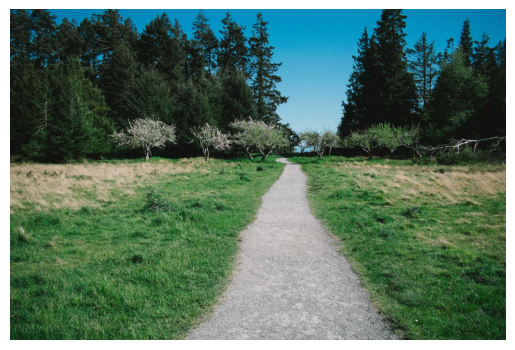

In [2]:
import requests
import cv2
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np

url = "https://picsum.photos/id/17/2500/1667"
response = requests.get(url)

# 1. DISPLAYING RGB IMAGE

img = Image.open(io.BytesIO(response.content))
img_rgb = np.array(img)
plt.imshow(img_rgb)
plt.axis("off")

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

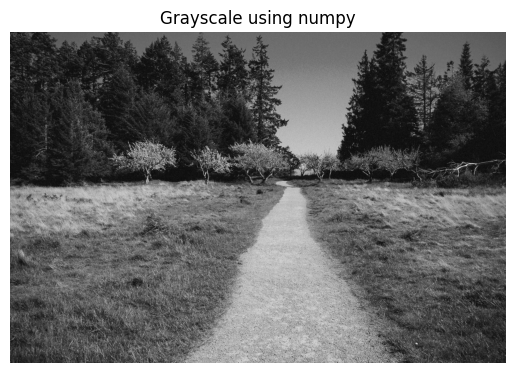

In [3]:
# 2. GRAYSCALE USING NUMPY

weights = np.array([0.3,0.59,0.11])
gray1 = np.dot(img_rgb[...,:3], weights)
plt.imshow(gray1, cmap='gray')
plt.title("Grayscale using numpy")
plt.axis("off")


(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

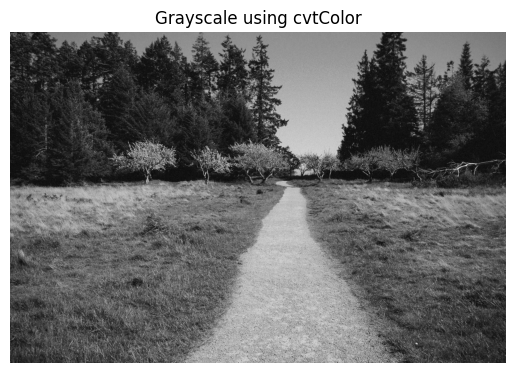

In [4]:
# 3. GRAYSCALE USING CVTCOLOR

gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale using cvtColor")
plt.axis("off")

There is definitely a difference between the grayscale images produced using numpy and using cvtcolor, mainly in contrast in some places and brightness in others.

In [5]:
# 4. RGB IMAGE SHAPE

img_rgb.shape

(1667, 2500, 3)

In [6]:
# 4. GRAY IMAGE SHAPE

gray.shape

(1667, 2500)

For RGB image there are 3 channels Red Green and Blue, hence the shape has 3 color dimensions and hence the array is 3-d array

For Grayscale image there is only 1 color channel hence the array is 2-d array

In [7]:
# 5. RGB PIXEL VALUES

a = np.array([1,2,3,4,5])
print("RGB pixel values: \n")
for i in a:
  print(img_rgb[0,i,2])

print("\nGrayscale pixel values: \n")
for i in a:
  print(gray[i,0])

RGB pixel values: 

62
57
48
42
39

Grayscale pixel values: 

48
40
37
42
50


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [8]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [9]:
# B1
gray_float = gray.astype(np.float32) # converting to float for mathematical operations
f = np.fft.fft2(gray_float) # applying fft
fshift = np.fft.fftshift(f) # shifting low frequencies to center

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

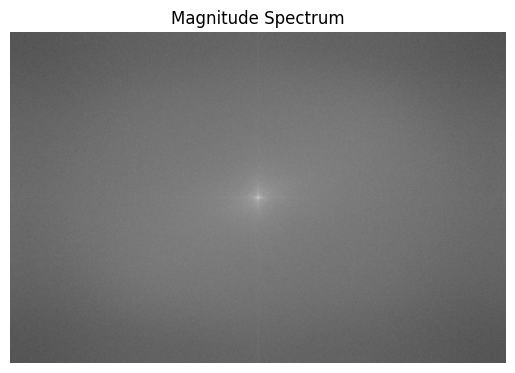

In [10]:
# B2
magnitude = 20*np.log10(np.abs(fshift)+1) # magnitude
phase = np.angle(fshift) # phase

plt.imshow(magnitude, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [11]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

**C1**

In [12]:
# creating lpf masks

rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

radius1 = 10
radius2 = 30
radius3 = 80

mask1_lpf = np.zeros((rows, cols), np.uint8)
mask2_lpf = np.zeros((rows, cols), np.uint8)
mask3_lpf = np.zeros((rows, cols), np.uint8)
cv2.circle(mask1_lpf, (ccol, crow), radius1, 1, -1)
cv2.circle(mask2_lpf, (ccol, crow), radius2, 1, -1)
cv2.circle(mask3_lpf, (ccol, crow), radius3, 1, -1)

# applying lpf masks
f1_lpf = fshift * mask1_lpf
f2_lpf = fshift * mask2_lpf
f3_lpf = fshift * mask3_lpf

# reconstruction for low pass filters
ishift1_lpf = np.fft.ifftshift(f1_lpf)
ishift2_lpf = np.fft.ifftshift(f2_lpf)
ishift3_lpf = np.fft.ifftshift(f3_lpf)

img_back1_lpf = np.fft.ifft2(ishift1_lpf)
img_back2_lpf = np.fft.ifft2(ishift2_lpf)
img_back3_lpf = np.fft.ifft2(ishift3_lpf)

img_back1_lpf = np.abs(img_back1_lpf)
img_back2_lpf = np.abs(img_back2_lpf)
img_back3_lpf = np.abs(img_back3_lpf)

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

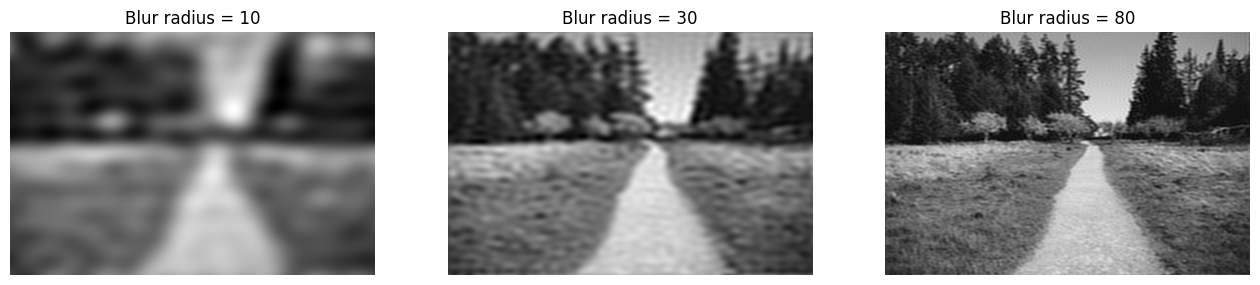

In [13]:
# plotting the images
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(img_back1_lpf, cmap = 'gray')
plt.title('Blur radius = 10')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back2_lpf, cmap = 'gray')
plt.title('Blur radius = 30')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_back3_lpf, cmap = 'gray')
plt.title('Blur radius = 80')
plt.axis('off')

Blur levels are increasing as radius decreases

This happens because increasing the radius of the circular filter allows more high frequency components to be preserved and hence the detail in the image is improved as compared to a filter with lesser radius where less high frequency components are preserved, and the detail is less.

**C2**

In [14]:
# creating hpf masks

mask1_hpf = 1 - mask1_lpf
mask2_hpf = 1 - mask2_lpf
mask3_hpf = 1 - mask3_lpf

# applying hpf masks
f1_hpf = fshift * mask1_hpf
f2_hpf = fshift * mask2_hpf
f3_hpf = fshift * mask3_hpf

# reconstruction for high pass filters
ishift1_hpf = np.fft.ifftshift(f1_hpf)
ishift2_hpf = np.fft.ifftshift(f2_hpf)
ishift3_hpf = np.fft.ifftshift(f3_hpf)

img_back1_hpf = np.fft.ifft2(ishift1_hpf)
img_back2_hpf = np.fft.ifft2(ishift2_hpf)
img_back3_hpf = np.fft.ifft2(ishift3_hpf)

img_back1_hpf = np.abs(img_back1_hpf)
img_back2_hpf = np.abs(img_back2_hpf)
img_back3_hpf = np.abs(img_back3_hpf)

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

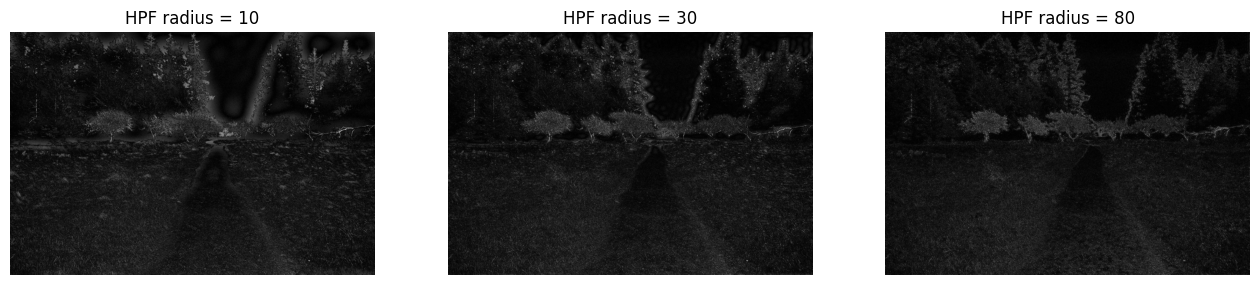

In [15]:
# plotting the images
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(img_back1_hpf, cmap = 'gray')
plt.title('HPF radius = 10')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back2_hpf, cmap = 'gray')
plt.title('HPF radius = 30')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_back3_hpf, cmap = 'gray')
plt.title('HPF radius = 80')
plt.axis('off')

**C3**

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

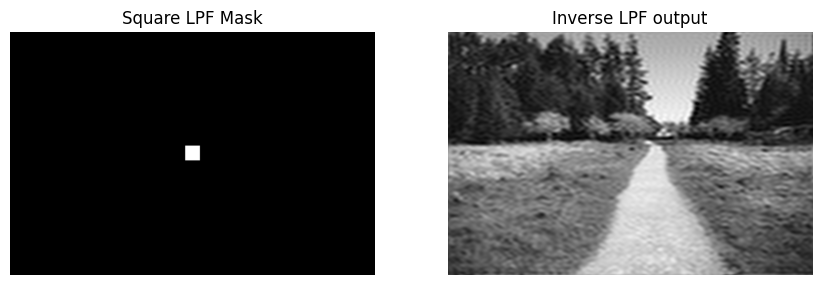

In [16]:
# creating lpf mask
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2

side = 50

mask = np.zeros((rows, cols), np.uint8)
cv2.rectangle(mask, (ccol-side, crow-side), (ccol+side, crow+side), 1, -1)

# applying mask
f_lpf = fshift * mask


# reconstruction for lpf
ishift_lpf = np.fft.ifftshift(f_lpf)
img_back_lpf = np.fft.ifft2(ishift_lpf)
img_back_lpf = np.abs(img_back_lpf)

# plotting reconstructed image
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(mask, cmap = 'gray')
plt.title('Square LPF Mask')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back_lpf, cmap = 'gray')
plt.title('Inverse LPF output')
plt.axis('off')

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [17]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

**D1**

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

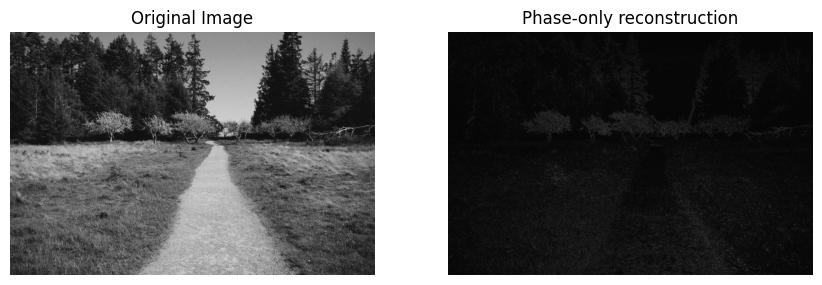

In [18]:
phase_only = fshift / np.abs(fshift) # this is just dividing a complex number by its magnitude to obtain phase only information
ishift_phase = np.fft.ifftshift(phase_only)
img_back_phase = np.fft.ifft2(ishift_phase)
img_back_phase = np.abs(img_back_phase)

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back_phase, cmap = 'gray')
plt.title('Phase-only reconstruction')
plt.axis('off')

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

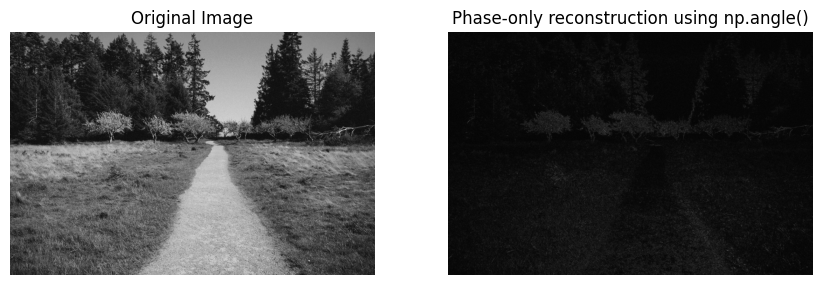

In [19]:
phase1_only = np.exp(1j * np.angle(fshift)) # this is just taking the exponential of the phase
ishift_phase1 = np.fft.ifftshift(phase1_only)
img_back_phase1 = np.fft.ifft2(ishift_phase1)
img_back_phase1 = np.abs(img_back_phase1)

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back_phase1, cmap = 'gray')
plt.title('Phase-only reconstruction using np.angle()')
plt.axis('off')

# output is still majorly similar in both the cases

**D2**

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

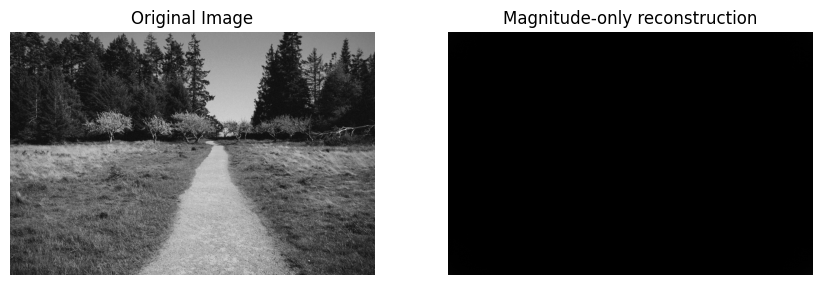

In [20]:
mag_only = np.abs(fshift)
ishift_mag = np.fft.ifftshift(mag_only)
img_back_mag = np.fft.ifft2(ishift_mag)
img_back_mag = np.abs(img_back_mag)

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back_mag, cmap = 'gray')
plt.title('Magnitude-only reconstruction')
plt.axis('off')

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

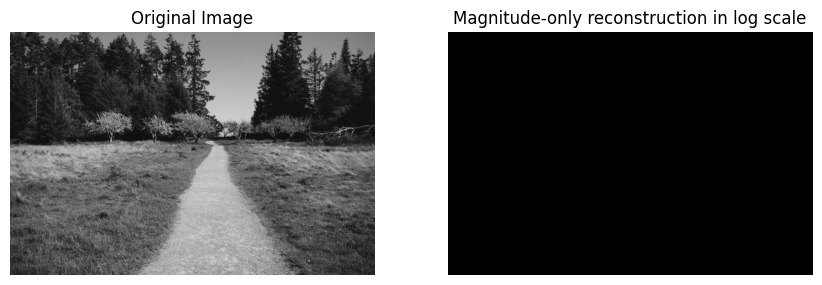

In [21]:
mag_only1 = 20*np.log10(np.abs(fshift)+1) # using logarithm magnitude scaling
ishift_mag1 = np.fft.ifftshift(mag_only1)
img_back_mag1 = np.fft.ifft2(ishift_mag1)
img_back_mag1 = np.abs(img_back_mag1)

plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_back_mag1, cmap = 'gray')
plt.title('Magnitude-only reconstruction in log scale')
plt.axis('off')

Usually it is the case that applying logarithmn to magnitude values makes them more spread apart and easier to analyze in the magnitude spectrum, the same hasnt happened with this image and im unsure of the reason

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

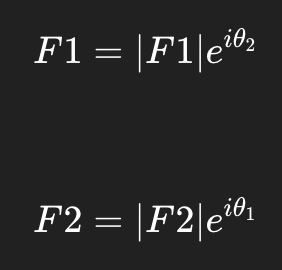

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [22]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

**Adding another image**

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

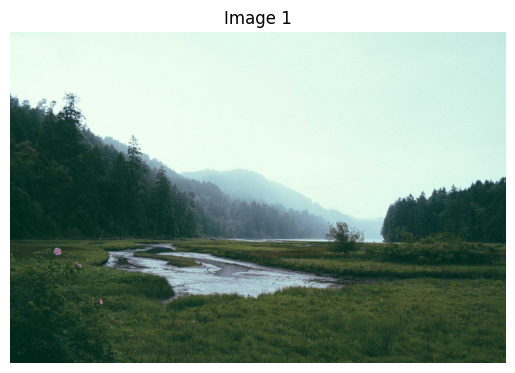

In [23]:
url1 = "https://picsum.photos/id/11/2500/1667"
response1 = requests.get(url1)

img1 = Image.open(io.BytesIO(response1.content))
img1_rgb = np.array(img1)
plt.imshow(img1_rgb)
plt.title("Image 1")
plt.axis('off')

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

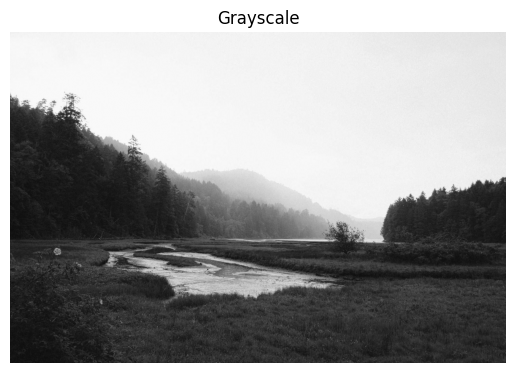

In [24]:
gray1 = cv2.cvtColor(img1_rgb, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

In [25]:
gray1_float = gray1.astype(np.float32) # converting to float for mathematical operations
f1 = np.fft.fft2(gray1_float) # applying fft
fshift1 = np.fft.fftshift(f1)
fshift2 = fshift

# Swapping magnitude and phases

phase1 = fshift1 / np.abs(fshift1)
phase2 = fshift2 / np.abs(fshift2)

magnitude1 = np.abs(fshift1)
magnitude2 = np.abs(fshift2)

fshift1_new = magnitude1 * phase2
fshift2_new = magnitude2 * phase1

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

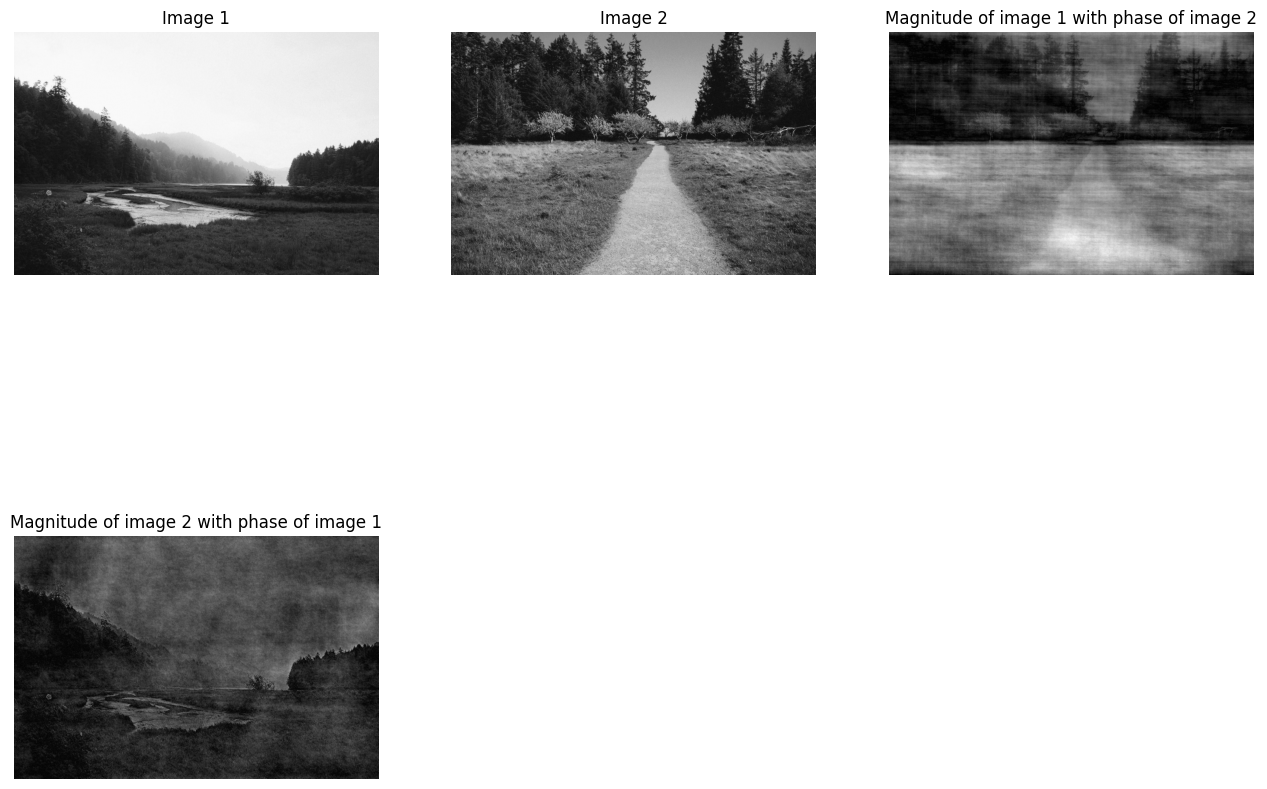

In [26]:
# Reconstruction
ishift1_new = np.fft.ifftshift(fshift1_new)
img_back1_new = np.fft.ifft2(ishift1_new)
img_back1_new = np.abs(img_back1_new)

ishift2_new = np.fft.ifftshift(fshift2_new)
img_back2_new = np.fft.ifft2(ishift2_new)
img_back2_new = np.abs(img_back2_new)

# Plotting
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.imshow(gray1, cmap = 'gray')
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap = 'gray')
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_back1_new, cmap = 'gray')
plt.title('Magnitude of image 1 with phase of image 2')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_back2_new, cmap = 'gray')
plt.title('Magnitude of image 2 with phase of image 1')
plt.axis('off')

It is clearly visible that phase retains the structure of image and magnitude retains the texture of image from the reconstruction results